In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\items.csv
./input\item_categories.csv
./input\sales_train.csv
./input\sample_submission.csv
./input\shops.csv
./input\test.csv


In [11]:
# importing the libraries

df_train = pd.read_csv('./input/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
df_test = pd.read_csv('./input/test.csv')
df_shops = pd.read_csv('./input/shops.csv')
df_items = pd.read_csv('./input/items.csv')
df_item_categories = pd.read_csv('./input/item_categories.csv')

C:\Users\jeeva\AppData\Local\Temp\ipykernel_3328\3871983746.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_train = pd.read_csv('./input/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)


In [ ]:
# checking the shapes of these datasets
print("Shape of train:", df_train.shape)
print("Shape of test:", df_test.shape)
print("Shape of shops:", df_shops.shape)
print("Shape of items:", df_items.shape)
print("Shape of item_categories:", df_item_categories.shape)

Shape of train: (2935849, 6)
Shape of test: (214200, 3)
Shape of shops: (60, 2)
Shape of items: (22170, 3)
Shape of item_categories: (84, 2)


In [ ]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [ ]:
df_test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
df_shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
df_items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
df_item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


In [ ]:
# checking if there is any Null data inside the given data

print("No. of Null values in the train set :", df_train.isnull().sum().sum())
print("No. of Null values in the test set :", df_test.isnull().sum().sum())
print("No. of Null values in the item set :", df_items.isnull().sum().sum())
print("No. of Null values in the shops set :", df_shops.isnull().sum().sum())
print("No. of Null values in the item_categories set :", df_item_categories.isnull().sum().sum())


No. of Null values in the train set : 0
No. of Null values in the test set : 0
No. of Null values in the item set : 0
No. of Null values in the shops set : 0
No. of Null values in the item_categories set : 0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


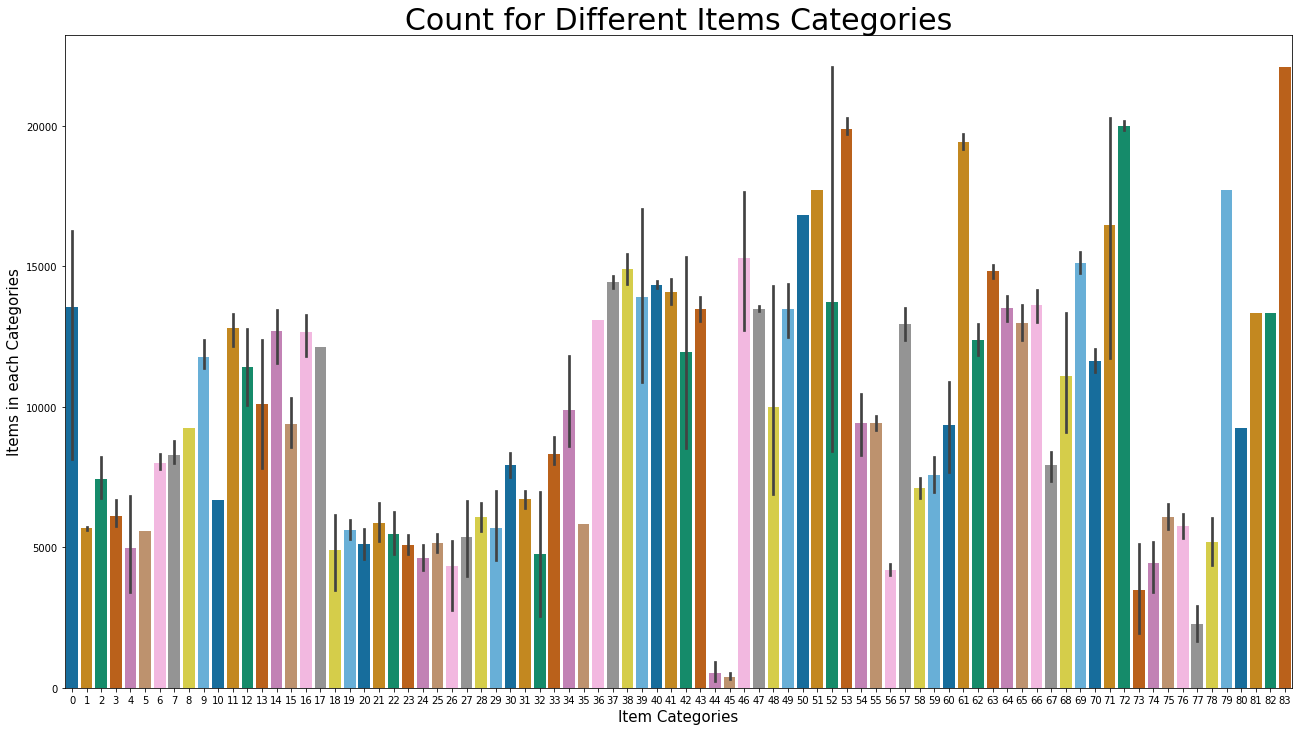

In [ ]:
# looking at the number of different categories
plt.rcParams['figure.figsize'] = (22, 12)
sns.barplot(df_items['item_category_id'], df_items['item_id'], palette = 'colorblind')
plt.title('Count for Different Items Categories', fontsize = 30)
plt.xlabel('Item Categories', fontsize = 15)
plt.ylabel('Items in each Categories', fontsize = 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


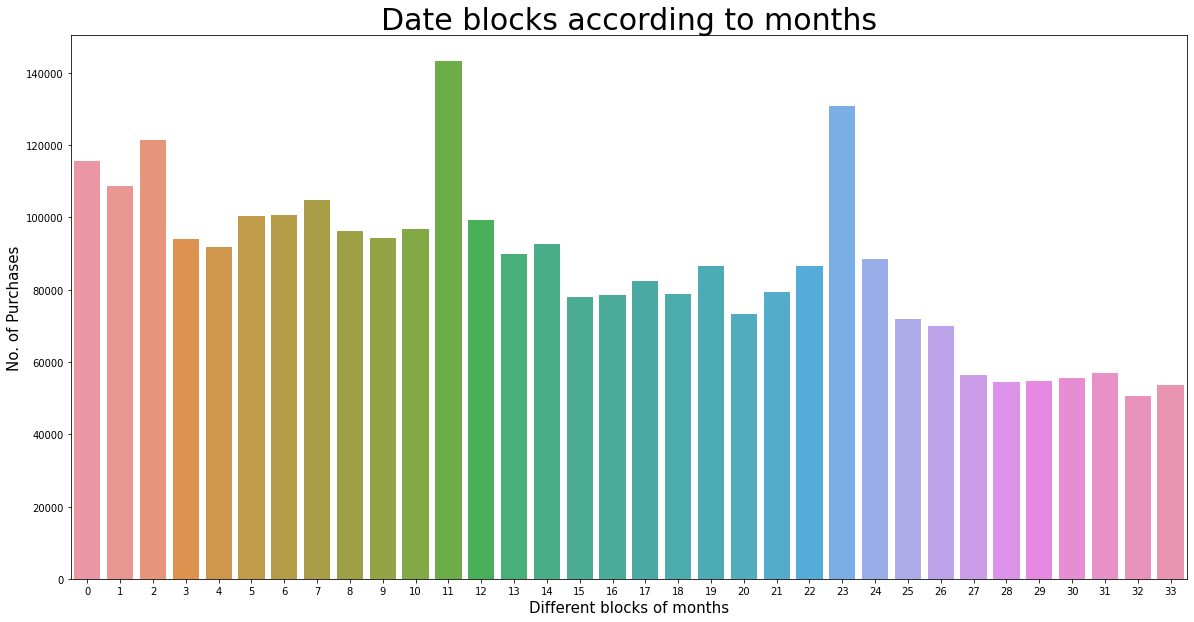

In [ ]:
# having a look at the distribution of item sold per day

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df_train['date_block_num'])
plt.title('Date blocks according to months', fontsize = 30)
plt.xlabel('Different blocks of months', fontsize = 15)
plt.ylabel('No. of Purchases', fontsize = 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


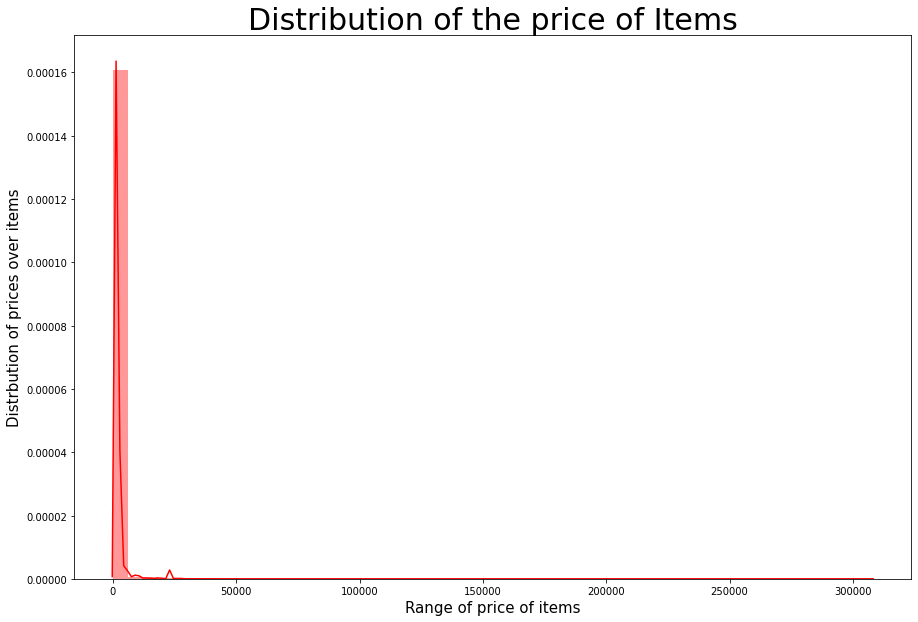

In [ ]:
# having a look at the distribution of item price

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(df_train['item_price'], color = 'red')
plt.title('Distribution of the price of Items', fontsize = 30)
plt.xlabel('Range of price of items', fontsize = 15)
plt.ylabel('Distrbution of prices over items', fontsize = 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


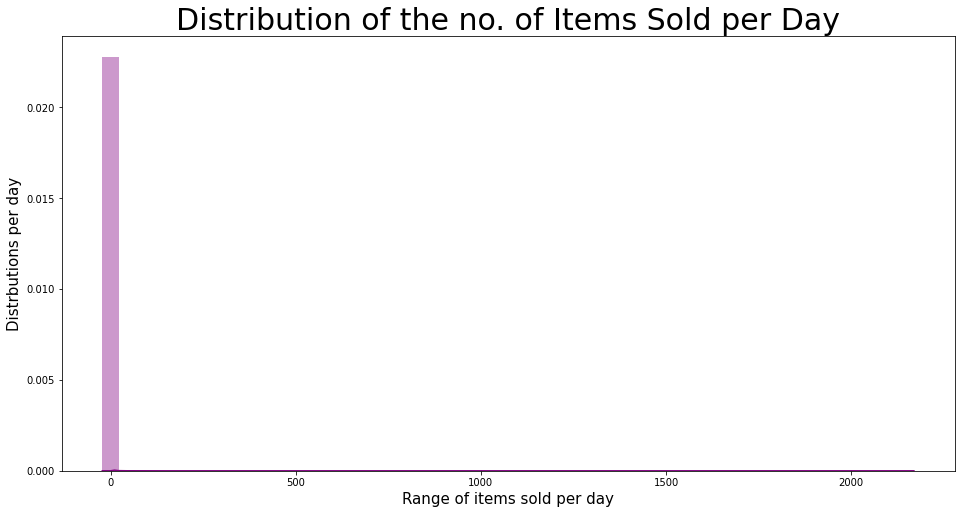

In [ ]:
# having a look at the distribution of item sold per day

plt.rcParams['figure.figsize'] = (16, 8)
sns.distplot(df_train['item_cnt_day'], color = 'purple')
plt.title('Distribution of the no. of Items Sold per Day', fontsize = 30)
plt.xlabel('Range of items sold per day', fontsize = 15)
plt.ylabel('Distrbutions per day', fontsize = 15)
plt.show()

In [ ]:
# checking the no. of unique item present in the stores

x = df_train['item_id'].nunique()
print("The No. of Unique Items Present in the stores available: ", x)

The No. of Unique Items Present in the stores available:  21807


In [ ]:
# checking the no. of unique item present in the stores

x = df_item_categories['item_category_id'].nunique()
print("The No. of Unique categories for Items Present in the stores available: ", x)

The No. of Unique categories for Items Present in the stores available:  84


In [ ]:
# checking the no. of unique shops given in the dataset

x = df_train['shop_id'].nunique()
print("No. of Unique Shops are :", x)

No. of Unique Shops are : 60


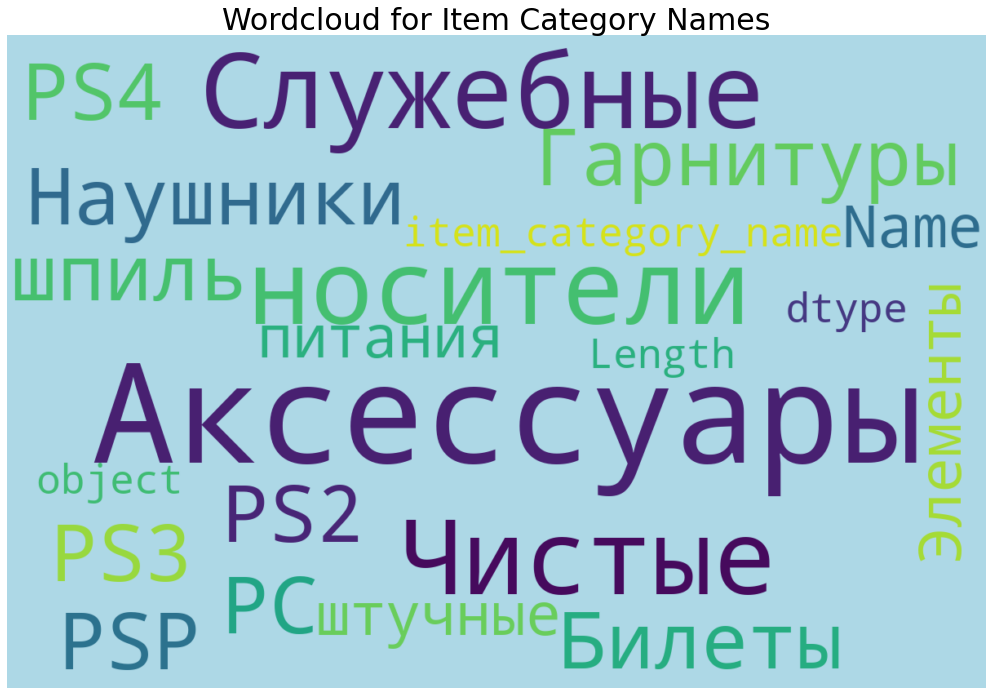

In [ ]:
# making a word cloud for item categories name

from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (18, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df_item_categories['item_category_name']))


plt.title('Wordcloud for Item Category Names', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

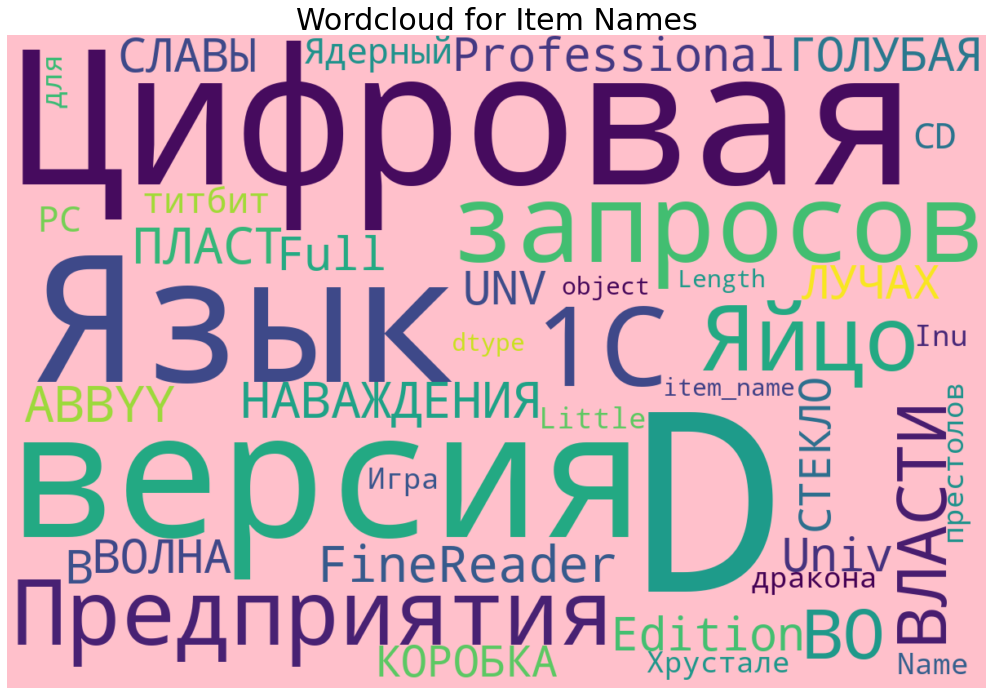

In [ ]:
# making a word cloud for item name

from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (18, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df_items['item_name']))


plt.title('Wordcloud for Item Names', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

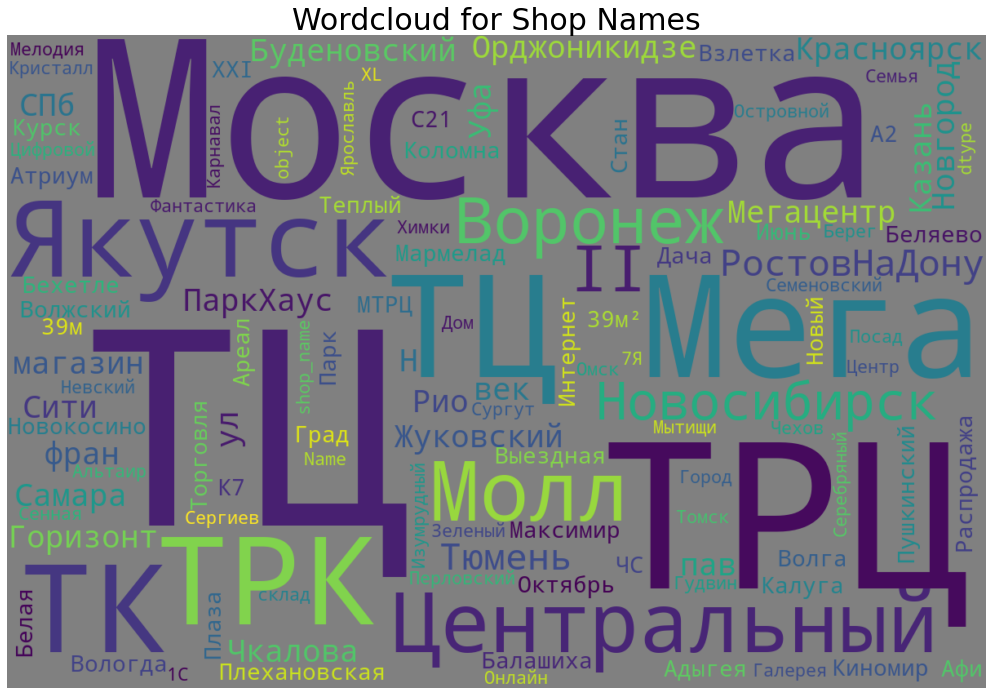

In [ ]:
# making a word cloud for shop name

from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (18, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gray',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df_shops['shop_name']))


plt.title('Wordcloud for Shop Names', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [ ]:
# making a new column day
df_train['day'] = df_train['date'].dt.day

# making a new column month
df_train['month'] = df_train['date'].dt.month

# making a new column year
df_train['year'] = df_train['date'].dt.year

# making a new column week
df_train['week'] = df_train['date'].dt.week

# checking the new columns
df_train.columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


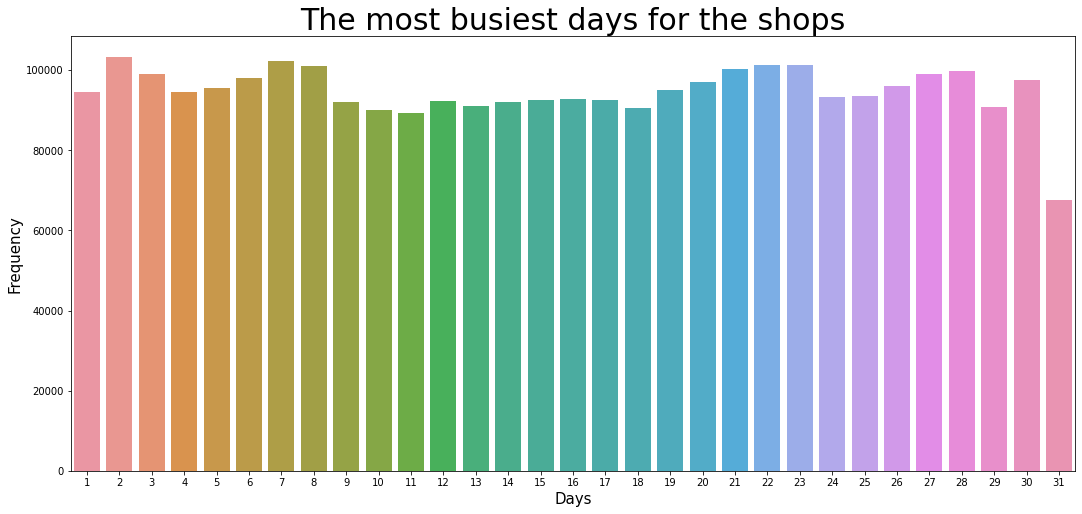

In [ ]:
# checking which days are most busisiest for the shops

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(df_train['day'])
plt.title('The most busiest days for the shops', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


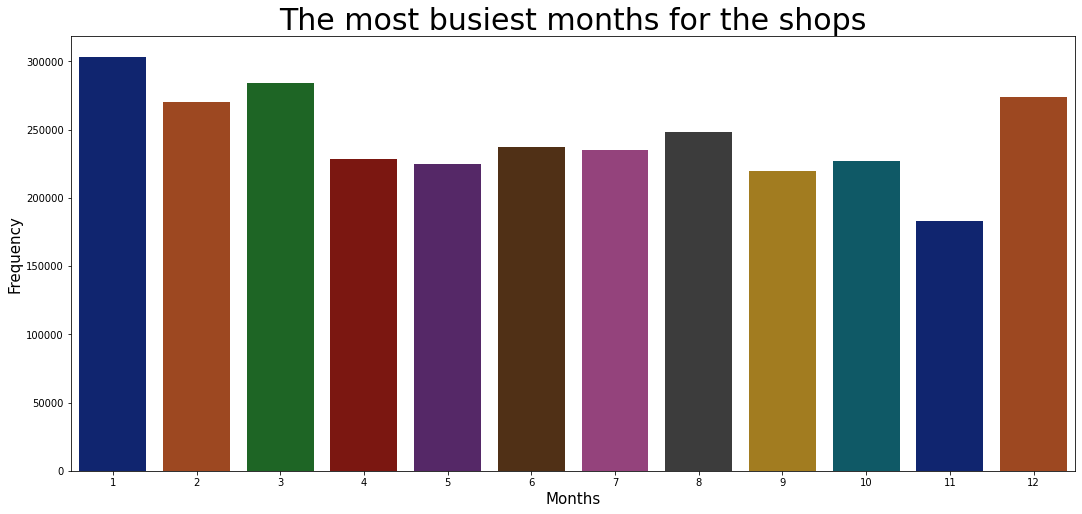

In [ ]:
# checking which months are most busisiest for the shops

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(df_train['month'], palette = 'dark')
plt.title('The most busiest months for the shops', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


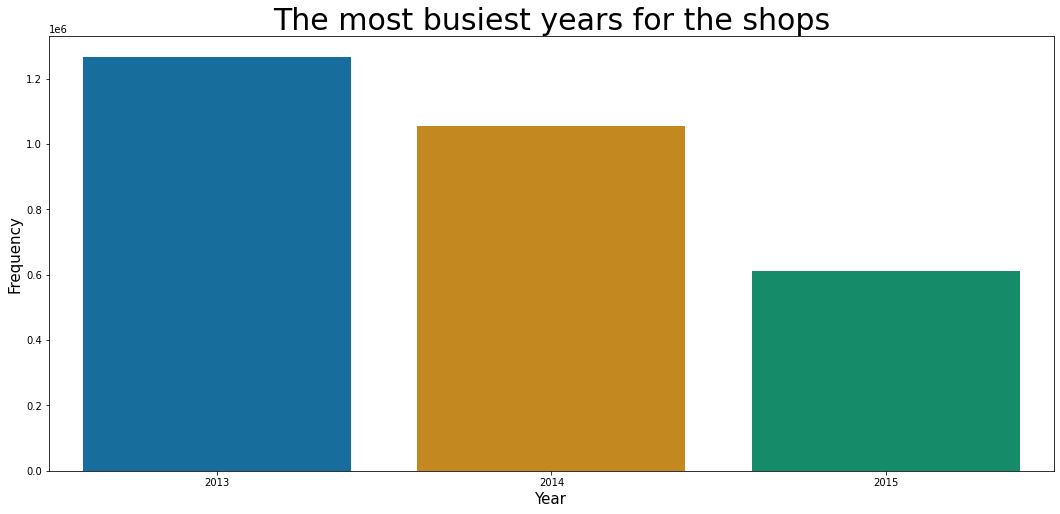

In [ ]:
# checking which years are most busisiest for the shops

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(df_train['year'], palette = 'colorblind')
plt.title('The most busiest years for the shops', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

In [ ]:
# checking the columns of the train data

df_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


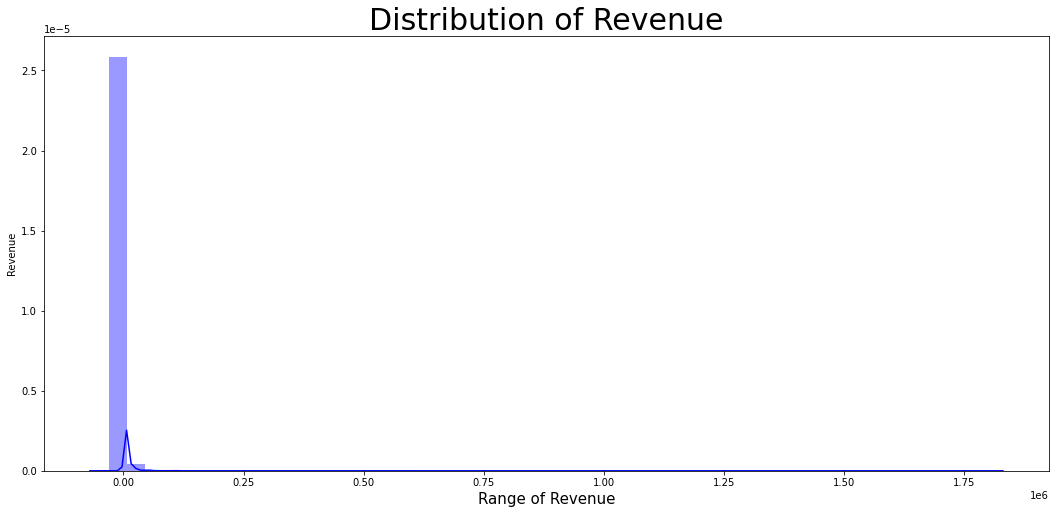

In [ ]:
# feature engineering

df_train['revenue'] = df_train['item_price'] * df_train['item_cnt_day']

sns.distplot(df_train['revenue'], color = 'blue')
plt.title('Distribution of Revenue', fontsize = 30)
plt.xlabel('Range of Revenue', fontsize = 15)
plt.ylabel('Revenue')
plt.show()

In [ ]:
df_train.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
day                        int64
month                      int64
year                       int64
week                       int64
revenue                  float64
dtype: object

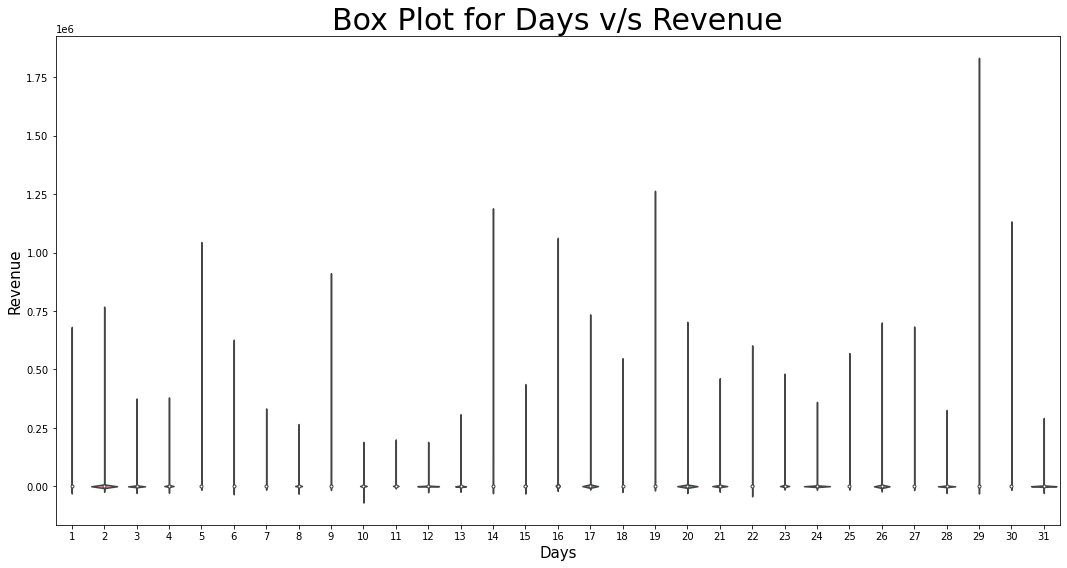

In [ ]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (18, 9)
sns.violinplot(x = df_train['day'], y = df_train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

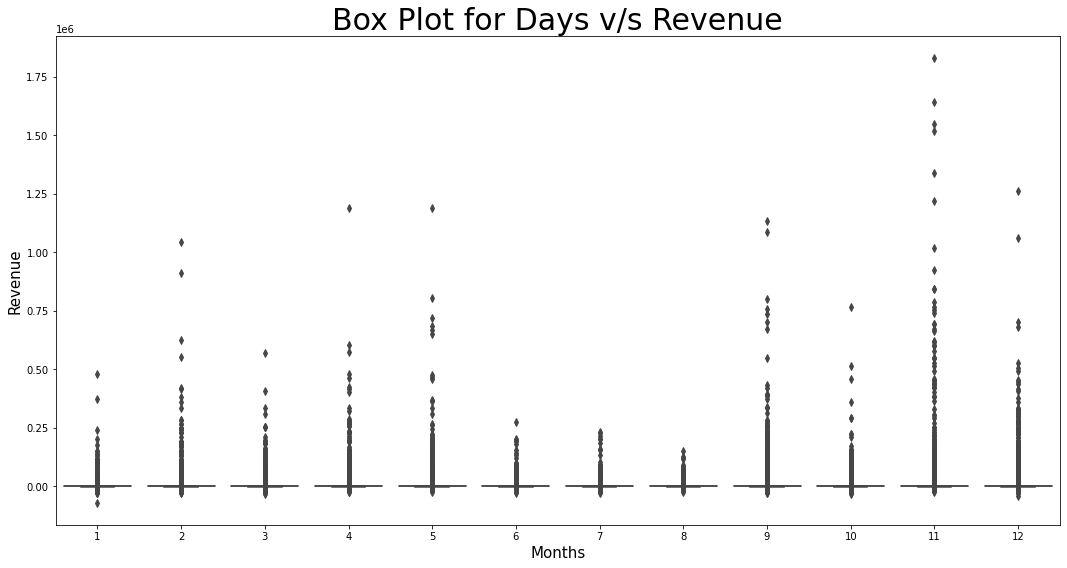

In [ ]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (18, 9)
sns.boxplot(x = df_train['month'], y = df_train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

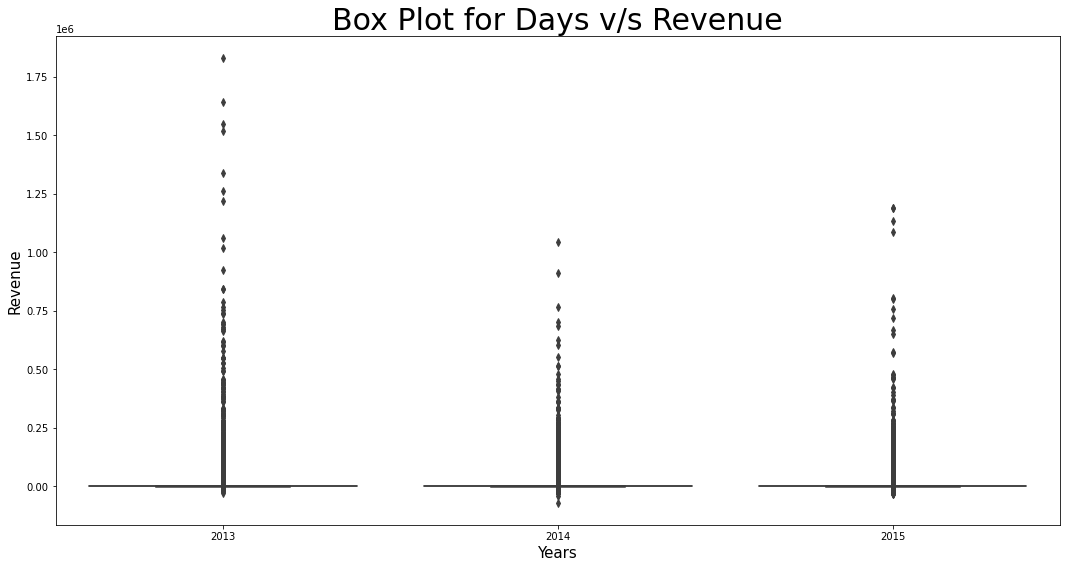

In [ ]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (18, 9)
sns.boxplot(x = df_train['year'], y = df_train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

In [ ]:
# converting the data into monthly sales data

# making a dataset with only monthly sales data
data = df_train.groupby([df_train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

# specifying the important attributes which we want to add to the data
data = data[['date','item_id','shop_id','item_cnt_day']]

# at last we can select the specific attributes from the dataset which are important 
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

# looking at the newly prepared datset
data.shape

(424124, 36)

In [ ]:
# let's merge the monthly sales data prepared to the test data set

test = pd.merge(df_test, data, on = ['item_id', 'shop_id'], how = 'left')

# filling the empty values found in the dataset
test.fillna(0, inplace = True)

# checking the dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# now let's create the actual training data

x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test['2015-10']

# deleting the first column so that it can predict the future sales data
x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

# checking the shapes of the datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_train.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)
Shape of y_test : (214200,)


In [ ]:
# let's check the x_train dataset

x_train.head()

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# let's check the x_test data

x_test.head()

,ID,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# splitting the data into train and valid dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 3)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (160650, 34)
Shape of x_test : (53550, 34)
Shape of y_train : (160650,)
Shape of y_test : (53550,)


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score

# Linear Regression

In [ ]:
lin_reg=LinearRegression()

In [ ]:
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
r2_score(y_test,y_pred)

0.10839100600375173

# Lasso Regression

In [ ]:
las_reg=Lasso(alpha=.01)
las_reg.fit(x_train, y_train)
y_pred = las_reg.predict(x_test)
r2_score(y_test,y_pred)

0.1094043165115055

# Ridge Regression

In [ ]:
ridge_reg=Ridge(alpha=3)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
r2_score(y_test,y_pred)

0.10839145909553283

# LGBM Regressor

In [ ]:

from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train, y_train)

y_pred_lgb = model_lgb.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_lgb)

0.10305631758109712

In [ ]:
# Get the test set predictions and clip values to the specified range
y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)
r2_score(y_test,y_pred_lgb)


0.024718862189764268

In [ ]:
# Create the submission file and submit
preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])
preds.to_csv('submission.csv',index_label='ID')

# Thanks You <(^_^)>